In [1]:
#!pip3 install pydot
#!pip install graphviz
from sklearn.linear_model import LogisticRegression
from imblearn.pipeline import Pipeline
from mlxtend.plotting import plot_decision_regions
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import re
import openpyxl
import copy as c
from sklearn.model_selection import train_test_split,StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn import svm, datasets
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn import metrics    
from sklearn import tree
import io
import pydot
from IPython.core.display import Image
import matplotlib as mpl
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from os import system   
import graphviz
from sklearn.naive_bayes import MultinomialNB
from os import system                 # graphviz 라이브러리 설치를 위함
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import Perceptron
import statsmodels.api as sm # 로지스틱
from sklearn.metrics import f1_score, make_scorer
from sklearn import model_selection
system("pip install graphviz")
# graphviz 사용에 있어서 error발생원인이 환경변수일 경우 환경변수 추가 필요
# 환경변수 추가 후 환경변수 설정 아래코드
os.environ["PATH"] += os.pathsep + 'C:\\Program Files\\Graphviz\\bin\\' 

from matplotlib.colors import ListedColormap


os.chdir("C:/Users/user/정신과")
os.listdir()

['.ipynb_checkpoints',
 'Boosting Method - XGB,Gradient,Ada.ipynb',
 'Boosting Method - XGB,Gradient,Ada_org_data.ipynb',
 'data.xlsx',
 'data_ver3.xlsx',
 'for문 도전.ipynb',
 'hyperparameter.png',
 'randomforest_top10.eps',
 '다담제공0620_final.xlsx',
 '머신러닝 총정리.ipynb',
 '머신러닝_정신과_우울위험-org.ipynb',
 '머신러닝_정신과_우울위험.ipynb',
 '머신러닝_정신과_우울위험_Data2_ver2_F1-Copy1.ipynb',
 '머신러닝_정신과_우울위험_Data2_ver2_F1.ipynb',
 '머신러닝_정신과_우울위험_ORGDATA.ipynb',
 '머신러닝_정신과_우울위험_ORG_ver1.ipynb',
 '머신러닝_정신과_우울위험_ORG_ver2.ipynb',
 '머신러닝_정신과_우울위험_ORG_ver2_F1.ipynb',
 '머신러닝_정신과_우울위험_ORG_ver3.ipynb',
 '머신러닝_정신과_전처리.ipynb',
 '머신러닝_정신과_전처리ver3.ipynb',
 '전체 정리_data2.xlsx',
 '전체 정리_org.xlsx']

In [2]:
data_org = pd.read_excel('data.xlsx')
data_org

,Unnamed: 0,category,Sex,BFI_extraversion_B,BFI_Affinity_B,BFI_diligence_B,BFI_Nervousness_B,BFI_Openness_B,Early_Life_Event1,Early_Life_Event2,...,HRV3000P_HF_B_gr,HRV3000P_LF/HF_B_gr,DMSPCAD_gr,RTIFMDMT_gr,RTIFMDRT_gr,SWMBE468_gr,SWMS_gr,Energy_Expenditure_Total_Steps_gr,Sleep_Period_Breakdown_Efficiency(%)_gr,Sleep_Period_Breakdown_Total_Sleep_Time(min)_gr
0,0,1,1,4,7,5,8,4,0,0,...,1,2,1,4,4,4,2,1,4,3
1,1,1,2,3,7,5,9,5,1,0,...,1,1,2,3,2,4,1,2,2,1
2,3,1,1,9,6,8,7,4,0,1,...,4,1,3,1,2,2,1,1,3,2
3,4,1,1,8,9,6,3,9,0,0,...,4,4,3,1,1,2,1,1,4,4
4,5,1,2,8,5,5,9,7,0,0,...,1,4,2,4,4,1,1,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,854,0,1,7,8,7,3,7,0,0,...,1,4,3,1,1,1,1,1,1,3
708,855,0,2,4,7,6,6,6,0,1,...,3,2,3,1,2,1,1,1,2,3
709,856,0,2,8,6,7,6,8,0,0,...,3,3,3,1,1,1,1,3,3,4
710,858,0,2,4,10,8,6,8,0,0,...,3,2,1,1,2,1,1,1,1,2


In [3]:
data1 = data_org.drop(columns=['Unnamed: 0'])

In [4]:
data=data1.drop(columns=['BFI_extraversion_B', 'BFI_Affinity_B',
       'BFI_diligence_B', 'BFI_Nervousness_B', 'BFI_Openness_B','GQ_TOTAL_B_gr',
       'Early_Life_Event1', 'Early_Life_Event2', 'Early_Life_Event3',
       'Early_Life_Event4', 'Early_Life_Event5', 'Early_Life_Event6',
       'Early_Life_Event7', 'Early_Life_Event8', 'Early_Life_Event9',
        'SSD_TOTAL_B_gr'])

In [5]:
data

,category,Sex,Age_gr,Edu_gr,pulse_B_gr,HRV3000P_MeanHRT_B_gr,HRV3000P_SDNN_B_gr,HRV3000P_RMSSD_B_gr,HRV3000P_TP_B_gr,HRV3000P_VLF_B_gr,...,HRV3000P_HF_B_gr,HRV3000P_LF/HF_B_gr,DMSPCAD_gr,RTIFMDMT_gr,RTIFMDRT_gr,SWMBE468_gr,SWMS_gr,Energy_Expenditure_Total_Steps_gr,Sleep_Period_Breakdown_Efficiency(%)_gr,Sleep_Period_Breakdown_Total_Sleep_Time(min)_gr
0,1,1,5,2,3,3,1,1,1,1,...,1,2,1,4,4,4,2,1,4,3
1,1,2,5,3,4,4,1,1,1,2,...,1,1,2,3,2,4,1,2,2,1
2,1,1,1,3,2,2,4,4,4,3,...,4,1,3,1,2,2,1,1,3,2
3,1,1,1,3,2,3,4,4,4,4,...,4,4,3,1,1,2,1,1,4,4
4,1,2,1,4,4,4,1,1,1,1,...,1,4,2,4,4,1,1,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,0,1,3,5,4,4,1,1,1,1,...,1,4,3,1,1,1,1,1,1,3
708,0,2,2,4,4,4,3,2,3,3,...,3,2,3,1,2,1,1,1,2,3
709,0,2,1,4,4,4,3,3,3,3,...,3,3,3,1,1,1,1,3,3,4
710,0,2,1,5,4,4,3,3,3,2,...,3,2,1,1,2,1,1,1,1,2


# 데이터 Train Test 나누기

In [6]:
X = data.drop(columns = {"category"})
y = data["category"]

# returns X_train, X_test, y_train, y_test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                   y, 
                                                    test_size=0.2, 
                                                    shuffle=True,
                                                    stratify=y, 
                                                    random_state=1004)

In [7]:
# 검증 데이터나 테스트 데이터가 아닌 학습데이터에서만 오버샘플링 사용할 것
smote = SMOTE(random_state=11)
X_train_over, y_train_over = smote.fit_resample(X_train, list(y_train))

In [8]:
from collections import Counter
Counter(y_train_over)

Counter({0: 412, 1: 412})

#  RF

In [9]:
# 학습 진행
forest = RandomForestClassifier(n_estimators=100)
forest.fit(X_train_over, y_train_over)
 
# 예측
y_pred = forest.predict(X_test)
#print(y_pred)
#print(list(y_test))
 
# 정확도 확인
print('정확도 :', metrics.accuracy_score(y_test, y_pred))

정확도 : 0.7062937062937062


In [10]:
forest = RandomForestClassifier()

### parameter 들을 dictionary 형태로 설정
parameters = {'n_estimators' : [40, 45, 50,55],'max_depth':[7,8,9], 
              'min_samples_leaf' : [3,4,5], 'min_samples_split':[1,2,3]}

#min_samples_leaf : 나눈 후의 최소 샘플 수 / min_samples_split : 나눅기 전의 최소 샘플 수

# Grid-search is used to find the optimal hyperparameters of a model which results in the most 'accurate' predictions.
# Cross-validation is a resampling procedure used to evaluate machine learning models on a 
# limited data sample. The procedure has a single parameter called k that refers to the number of groups that a given data sample is to be split into. 
# As such, the procedure is often called k-fold cross-validation.
grid_dtree = GridSearchCV(forest, param_grid=parameters, cv=5,scoring='f1_micro', refit=True)

grid_dtree.fit(X_train_over, y_train_over)

# GridSearchCV 결과 추출하여 DataFrame으로 변환
scores_df = pd.DataFrame(grid_dtree.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score',
           'split0_test_score', 'split1_test_score', 'split2_test_score']]

C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\user\anaconda3\lib\site-packages\joblib\parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\user\anaconda3\lib\site-packages\joblib\parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\user\anaconda3\lib\site-packages\joblib\parallel.py", line 765, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  Fil

C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\user\anaconda3\lib\site-packages\joblib\parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\user\anaconda3\lib\site-packages\joblib\parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\user\anaconda3\lib\site-packages\joblib\parallel.py", line 765, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  Fil

C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\user\anaconda3\lib\site-packages\joblib\parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\user\anaconda3\lib\site-packages\joblib\parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\user\anaconda3\lib\site-packages\joblib\parallel.py", line 765, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  Fil

C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\user\anaconda3\lib\site-packages\joblib\parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\user\anaconda3\lib\site-packages\joblib\parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\user\anaconda3\lib\site-packages\joblib\parallel.py", line 765, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  Fil

C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\user\anaconda3\lib\site-packages\joblib\parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\user\anaconda3\lib\site-packages\joblib\parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\user\anaconda3\lib\site-packages\joblib\parallel.py", line 765, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  Fil

C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\user\anaconda3\lib\site-packages\joblib\parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\user\anaconda3\lib\site-packages\joblib\parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\user\anaconda3\lib\site-packages\joblib\parallel.py", line 765, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  Fil

C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\user\anaconda3\lib\site-packages\joblib\parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\user\anaconda3\lib\site-packages\joblib\parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\user\anaconda3\lib\site-packages\joblib\parallel.py", line 765, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  Fil

C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\user\anaconda3\lib\site-packages\joblib\parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\user\anaconda3\lib\site-packages\joblib\parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\user\anaconda3\lib\site-packages\joblib\parallel.py", line 765, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  Fil

C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\user\anaconda3\lib\site-packages\joblib\parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\user\anaconda3\lib\site-packages\joblib\parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\user\anaconda3\lib\site-packages\joblib\parallel.py", line 765, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  Fil

C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\user\anaconda3\lib\site-packages\joblib\parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\user\anaconda3\lib\site-packages\joblib\parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\user\anaconda3\lib\site-packages\joblib\parallel.py", line 765, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  Fil

C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\user\anaconda3\lib\site-packages\joblib\parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\user\anaconda3\lib\site-packages\joblib\parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\user\anaconda3\lib\site-packages\joblib\parallel.py", line 765, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  Fil

C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\user\anaconda3\lib\site-packages\joblib\parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\user\anaconda3\lib\site-packages\joblib\parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\user\anaconda3\lib\site-packages\joblib\parallel.py", line 765, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  Fil

C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\user\anaconda3\lib\site-packages\joblib\parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\user\anaconda3\lib\site-packages\joblib\parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\user\anaconda3\lib\site-packages\joblib\parallel.py", line 765, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  Fil

C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\user\anaconda3\lib\site-packages\joblib\parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\user\anaconda3\lib\site-packages\joblib\parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\user\anaconda3\lib\site-packages\joblib\parallel.py", line 765, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  Fil

C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\user\anaconda3\lib\site-packages\joblib\parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\user\anaconda3\lib\site-packages\joblib\parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\user\anaconda3\lib\site-packages\joblib\parallel.py", line 765, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  Fil

C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\user\anaconda3\lib\site-packages\joblib\parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\user\anaconda3\lib\site-packages\joblib\parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\user\anaconda3\lib\site-packages\joblib\parallel.py", line 765, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  Fil

C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\user\anaconda3\lib\site-packages\joblib\parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\user\anaconda3\lib\site-packages\joblib\parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\user\anaconda3\lib\site-packages\joblib\parallel.py", line 765, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  Fil

C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\user\anaconda3\lib\site-packages\joblib\parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\user\anaconda3\lib\site-packages\joblib\parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\user\anaconda3\lib\site-packages\joblib\parallel.py", line 765, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  Fil

C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\user\anaconda3\lib\site-packages\joblib\parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\user\anaconda3\lib\site-packages\joblib\parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\user\anaconda3\lib\site-packages\joblib\parallel.py", line 765, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  Fil

C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\user\anaconda3\lib\site-packages\joblib\parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\user\anaconda3\lib\site-packages\joblib\parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\user\anaconda3\lib\site-packages\joblib\parallel.py", line 765, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  Fil

C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\user\anaconda3\lib\site-packages\joblib\parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\user\anaconda3\lib\site-packages\joblib\parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\user\anaconda3\lib\site-packages\joblib\parallel.py", line 765, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  Fil

C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\user\anaconda3\lib\site-packages\joblib\parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\user\anaconda3\lib\site-packages\joblib\parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\user\anaconda3\lib\site-packages\joblib\parallel.py", line 765, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  Fil

C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan 0.81078344 0.79988914
 0.80473762 0.7913969  0.79742055 0.80472284 0.79375462 0.79379897
        nan        nan        nan        nan 0.78773836 0.79866962
 0.79017738 0.77924612 0.78412417 0.79379897 0.79137472 0.78533629
        nan        nan        nan        nan 0.7768071  0.784102
 0.78773836 0.78533629 0.77441981 0.78047302 0.78653363 0.78529194
        nan        nan        nan        nan 0.78895787 0.79620843
 0.79986696 0.80228381 0.81322247 0.78773836 0.78654841 0.79381375
        nan        nan        nan        nan 0.78892831 0.80594235
 0.78894309 0.7840946  0.79017738 0.79501109 0.778034   0.78653363
        nan        nan        nan        nan 0.77804139 0.7950037
 0.78653363 0.79016999 0.78288248 0.78528455 0.79986696 0.79382114
        nan        nan        nan        nan 0.79740576 0

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 7, 'min_samples_leaf': 3, 'min_s...",NaN,108,NaN,NaN,NaN
1,"{'max_depth': 7, 'min_samples_leaf': 3, 'min_s...",NaN,84,NaN,NaN,NaN
2,"{'max_depth': 7, 'min_samples_leaf': 3, 'min_s...",NaN,83,NaN,NaN,NaN
3,"{'max_depth': 7, 'min_samples_leaf': 3, 'min_s...",NaN,82,NaN,NaN,NaN
4,"{'max_depth': 7, 'min_samples_leaf': 3, 'min_s...",0.810783,3,0.781818,0.672727,0.848485
...,...,...,...,...,...,...
103,"{'max_depth': 9, 'min_samples_leaf': 5, 'min_s...",0.782875,66,0.727273,0.654545,0.836364
104,"{'max_depth': 9, 'min_samples_leaf': 5, 'min_s...",0.796253,26,0.745455,0.642424,0.836364
105,"{'max_depth': 9, 'min_samples_leaf': 5, 'min_s...",0.795018,29,0.775758,0.630303,0.836364
106,"{'max_depth': 9, 'min_samples_leaf': 5, 'min_s...",0.799874,17,0.751515,0.636364,0.854545


In [11]:
print('GridSearchCV 최적 파라미터:', grid_dtree.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dtree.best_score_))

GridSearchCV 최적 파라미터: {'max_depth': 9, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 55}
GridSearchCV 최고 정확도: 0.8193


In [12]:
rf_1=RandomForestClassifier(max_depth= 9,min_samples_leaf = 3, min_samples_split=2,n_estimators = 40, random_state=400)
rf_1.fit(X_train_over, y_train_over)
pred=rf_1.predict(X_train_over)
print('f1: {0:.4f}'.format(metrics.f1_score(y_train_over , pred, average  = "weighted")))
print('accuracy: {0:.4f}'.format(metrics.accuracy_score(y_train_over , pred)))
print('precision: {0:.4f}'.format(metrics.precision_score(y_train_over , pred, average  = "weighted")))
print('recall: {0:.4f}'.format(metrics.recall_score(y_train_over , pred, average  = "weighted")))

f1: 0.9296
accuracy: 0.9296
precision: 0.9300
recall: 0.9296


Text(0.5, 1.0, 'Confusion Matrix')

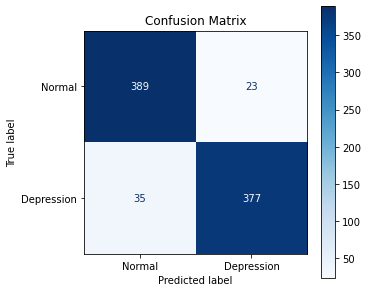

In [13]:
# confusion matrix plot
# Confusion matrix - > %로 나타내기!
plt.rcParams['figure.figsize'] = [5, 5]
label=['Normal', 'Depression'] # 라벨 설정

plot = plot_confusion_matrix(rf_1, # 분류 모델
                             X_train_over, y_train_over, # 예측 데이터와 예측값의 정답(y_true)
                             display_labels=label, # 표에 표시할 labels
                             cmap='Blues', # 컬러맵(plt.cm.Reds, plt.cm.rainbow 등이 있음)
                             normalize=None) # 'true', 'pred', 'all' 중에서 지정 가능. default=None
plot.ax_.set_title('Confusion Matrix')

In [14]:
rf_1=RandomForestClassifier(max_depth= 9,min_samples_leaf = 3, min_samples_split=2,n_estimators = 40, random_state=400)
rf_1.fit(X_train_over, y_train_over)
pred=rf_1.predict(X_test)
print('f1: {0:.4f}'.format(metrics.f1_score(y_test , pred, average  = "weighted")))
print('accuracy: {0:.4f}'.format(metrics.accuracy_score(y_test , pred)))
print('precision: {0:.4f}'.format(metrics.precision_score(y_test , pred, average  = "weighted")))
print('recall: {0:.4f}'.format(metrics.recall_score(y_test , pred, average  = "weighted")))

f1: 0.7283
accuracy: 0.7273
precision: 0.7294
recall: 0.7273


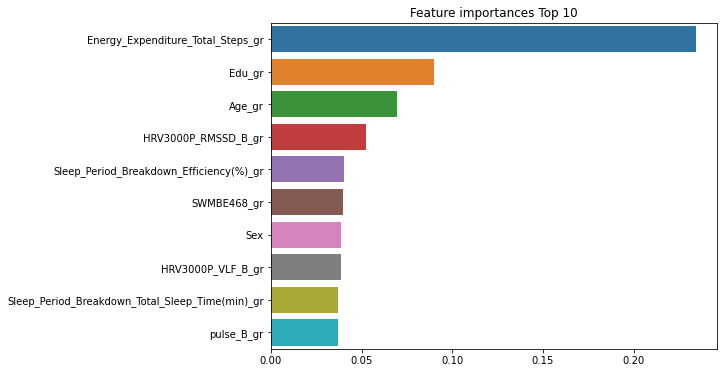

In [15]:
importances_values = rf_1.feature_importances_
importances = pd.Series(importances_values, index=X_train_over.columns)
top10 = importances.sort_values(ascending=False)[:10]
plt.figure(figsize=(8, 6))
plt.title('Feature importances Top 10')
sns.barplot(x = top10, y = top10.index)

plt.savefig('randomforest_top10.eps', format='eps')
plt.show()

Text(0.5, 1.0, 'Confusion Matrix')

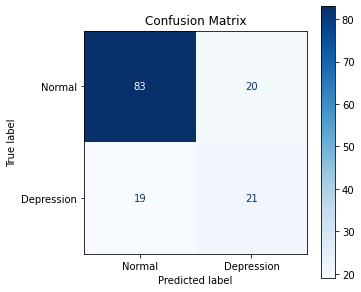

In [16]:
# confusion matrix plot
# Confusion matrix - > %로 나타내기!
plt.rcParams['figure.figsize'] = [5, 5]
label=['Normal', 'Depression'] # 라벨 설정

plot = plot_confusion_matrix(rf_1, # 분류 모델
                             X_test, y_test, # 예측 데이터와 예측값의 정답(y_true)
                             display_labels=label, # 표에 표시할 labels
                             cmap='Blues', # 컬러맵(plt.cm.Reds, plt.cm.rainbow 등이 있음)
                             normalize=None) # 'true', 'pred', 'all' 중에서 지정 가능. default=None
plot.ax_.set_title('Confusion Matrix')

# DT

In [17]:
DT =  DecisionTreeClassifier(random_state=400)
### parameter 들을 dictionary 형태로 설정
parameters = {'max_depth':[7,8,9,10,11,12,13], 'min_samples_split':[1,2,3,4,5,6,7]}
grid_DT = GridSearchCV(DT, param_grid=parameters, cv=5,scoring='f1_micro', refit=True)

grid_DT.fit(X_train_over, y_train_over)

scores_df = pd.DataFrame(grid_DT.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score',
           'split0_test_score', 'split1_test_score', 'split2_test_score']]

C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score 

C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score 

C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score 

C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score 

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 7, 'min_samples_split': 1}",NaN,49,NaN,NaN,NaN
1,"{'max_depth': 7, 'min_samples_split': 2}",0.724605,40,0.666667,0.606061,0.824242
2,"{'max_depth': 7, 'min_samples_split': 3}",0.724605,40,0.684848,0.618182,0.806061
3,"{'max_depth': 7, 'min_samples_split': 4}",0.728234,36,0.684848,0.618182,0.806061
4,"{'max_depth': 7, 'min_samples_split': 5}",0.727029,39,0.684848,0.612121,0.812121
5,"{'max_depth': 7, 'min_samples_split': 6}",0.728234,34,0.690909,0.612121,0.812121
6,"{'max_depth': 7, 'min_samples_split': 7}",0.728226,37,0.684848,0.624242,0.812121
7,"{'max_depth': 8, 'min_samples_split': 1}",NaN,45,NaN,NaN,NaN
8,"{'max_depth': 8, 'min_samples_split': 2}",0.729431,32,0.690909,0.624242,0.818182
9,"{'max_depth': 8, 'min_samples_split': 3}",0.736704,16,0.696970,0.636364,0.824242


In [18]:
print('GridSearchCV 최적 파라미터:', grid_DT.best_params_)
print('GridSearchCV 최고 f1: {0:.4f}'.format(grid_DT.best_score_))

GridSearchCV 최적 파라미터: {'max_depth': 8, 'min_samples_split': 5}
GridSearchCV 최고 f1: 0.7464


In [19]:
DT =  DecisionTreeClassifier(max_depth=8,min_samples_split=5,random_state=400) # random_state 를 바꾸면 decision tree가 바뀜
DT.fit(X_train_over,y_train_over)
pred = DT.predict(np.array(X_train_over))

print('f1: {0:.4f}'.format(metrics.f1_score(y_train_over , pred, average  = "weighted")))
print('accuracy: {0:.4f}'.format(metrics.accuracy_score(y_train_over , pred)))
print('precision: {0:.4f}'.format(metrics.precision_score(y_train_over , pred, average  = "weighted")))
print('recall: {0:.4f}'.format(metrics.recall_score(y_train_over , pred, average  = "weighted")))

f1: 0.9284
accuracy: 0.9284
precision: 0.9290
recall: 0.9284


Text(0.5, 1.0, 'Confusion Matrix')

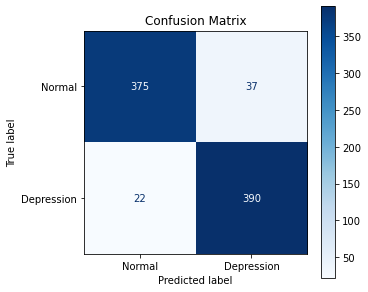

In [20]:
# Confusion matrix - > %로 나타내기!
label=['Normal', 'Depression'] # 라벨 설정

plot = plot_confusion_matrix(DT, # 분류 모델
                             X_train_over, y_train_over, # 예측 데이터와 예측값의 정답(y_true)
                             display_labels=label, # 표에 표시할 labels
                             cmap='Blues', # 컬러맵(plt.cm.Reds, plt.cm.rainbow 등이 있음)
                             normalize=None) # 'true', 'pred', 'all' 중에서 지정 가능. default=None
plot.ax_.set_title('Confusion Matrix')

In [21]:
DT =  DecisionTreeClassifier(max_depth=8,min_samples_split=5,random_state=400) # random_state 를 바꾸면 decision tree가 바뀜
DT.fit(X_train_over,y_train_over)
pred = DT.predict(np.array(X_test))

print('f1: {0:.4f}'.format(metrics.f1_score(y_test , pred, average  = "weighted")))
print('accuracy: {0:.4f}'.format(metrics.accuracy_score(y_test , pred)))
print('precision: {0:.4f}'.format(metrics.precision_score(y_test , pred, average  = "weighted")))
print('recall: {0:.4f}'.format(metrics.recall_score(y_test , pred, average  = "weighted")))

f1: 0.6132
accuracy: 0.5944
precision: 0.6533
recall: 0.5944


Text(0.5, 1.0, 'Confusion Matrix')

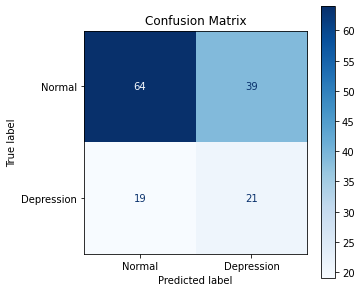

In [22]:
# Confusion matrix - > %로 나타내기!
label=['Normal', 'Depression'] # 라벨 설정

plot = plot_confusion_matrix(DT, # 분류 모델
                             X_test, y_test, # 예측 데이터와 예측값의 정답(y_true)
                             display_labels=label, # 표에 표시할 labels
                             cmap='Blues', # 컬러맵(plt.cm.Reds, plt.cm.rainbow 등이 있음)
                             normalize=None) # 'true', 'pred', 'all' 중에서 지정 가능. default=None
plot.ax_.set_title('Confusion Matrix')

# NB

In [23]:
NB =  MultinomialNB()
### parameter 들을 dictionary 형태로 설정
parameters = {  'alpha' : np.linspace(0.01, 1, 100)}
grid_NB = GridSearchCV(NB, param_grid=parameters, cv=5,scoring='f1_micro', refit=True)

grid_NB.fit(X_train_over, y_train_over)

# GridSearchCV 결과 추출하여 DataFrame으로 변환
scores_df = pd.DataFrame(grid_NB.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score',
           'split0_test_score', 'split1_test_score', 'split2_test_score']]


,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,{'alpha': 0.01},0.654161,1,0.678788,0.557576,0.654545
1,{'alpha': 0.02},0.654161,1,0.678788,0.557576,0.654545
2,{'alpha': 0.03},0.654161,1,0.678788,0.557576,0.654545
3,{'alpha': 0.04},0.654161,1,0.678788,0.557576,0.654545
4,{'alpha': 0.05},0.654161,1,0.678788,0.557576,0.654545
...,...,...,...,...,...,...
95,{'alpha': 0.9600000000000001},0.654161,1,0.678788,0.557576,0.654545
96,{'alpha': 0.97},0.654161,1,0.678788,0.557576,0.654545
97,{'alpha': 0.98},0.654161,1,0.678788,0.557576,0.654545
98,{'alpha': 0.99},0.654161,1,0.678788,0.557576,0.654545


In [24]:
print('GridSearchCV 최적 파라미터:', grid_NB.best_params_)
print('GridSearchCV 최고 f1: {0:.4f}'.format(grid_NB.best_score_))

GridSearchCV 최적 파라미터: {'alpha': 0.01}
GridSearchCV 최고 f1: 0.6542


In [25]:
NB = MultinomialNB(alpha=0.01) # random_state 를 바꾸면 decision tree가 바뀜
NB.fit(X_train_over,y_train_over)
pred = NB.predict(np.array(X_train_over))

print('f1: {0:.4f}'.format(metrics.f1_score(y_train_over , pred, average  = "weighted")))
print('accuracy: {0:.4f}'.format(metrics.accuracy_score(y_train_over , pred)))
print('precision: {0:.4f}'.format(metrics.precision_score(y_train_over , pred, average  = "weighted")))
print('recall: {0:.4f}'.format(metrics.recall_score(y_train_over , pred, average  = "weighted")))

f1: 0.6614
accuracy: 0.6614
precision: 0.6615
recall: 0.6614


Text(0.5, 1.0, 'Confusion Matrix')

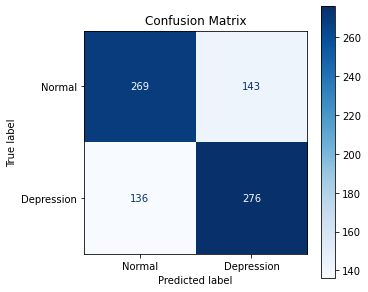

In [26]:
# Confusion matrix - > %로 나타내기!
label=['Normal', 'Depression'] # 라벨 설정

plot = plot_confusion_matrix(NB, # 분류 모델
                             X_train_over, y_train_over, # 예측 데이터와 예측값의 정답(y_true)
                             display_labels=label, # 표에 표시할 labels
                             cmap='Blues', # 컬러맵(plt.cm.Reds, plt.cm.rainbow 등이 있음)
                             normalize=None) # 'true', 'pred', 'all' 중에서 지정 가능. default=None
plot.ax_.set_title('Confusion Matrix')

In [27]:
NB = MultinomialNB(alpha=0.01) # random_state 를 바꾸면 decision tree가 바뀜
NB.fit(X_train_over,y_train_over)
pred = NB.predict(np.array(X_test))

print('f1: {0:.4f}'.format(metrics.f1_score(y_test , pred, average  = "weighted")))
print('accuracy: {0:.4f}'.format(metrics.accuracy_score(y_test , pred)))
print('precision: {0:.4f}'.format(metrics.precision_score(y_test , pred, average  = "weighted")))
print('recall: {0:.4f}'.format(metrics.recall_score(y_test , pred, average  = "weighted")))

f1: 0.6265
accuracy: 0.6084
precision: 0.6666
recall: 0.6084


Text(0.5, 1.0, 'Confusion Matrix')

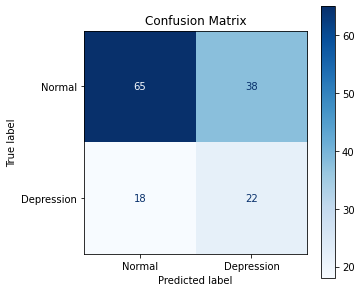

In [28]:
# Confusion matrix - > %로 나타내기!
label=['Normal', 'Depression'] # 라벨 설정

plot = plot_confusion_matrix(NB, # 분류 모델
                             X_test, y_test, # 예측 데이터와 예측값의 정답(y_true)
                             display_labels=label, # 표에 표시할 labels
                             cmap='Blues', # 컬러맵(plt.cm.Reds, plt.cm.rainbow 등이 있음)
                             normalize=None) # 'true', 'pred', 'all' 중에서 지정 가능. default=None
plot.ax_.set_title('Confusion Matrix')

# KNN

In [29]:
knn = KNeighborsClassifier()

k_range = list(range(3, 31))
param_grid = dict(n_neighbors=k_range)
  
grid_knn = GridSearchCV(knn, param_grid=param_grid, cv=5, scoring='f1_micro',refit=True)

grid_knn.fit(X_train_over, y_train_over)

# GridSearchCV 결과 추출하여 DataFrame으로 변환
scores_df = pd.DataFrame(grid_knn.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score',
           'split0_test_score', 'split1_test_score', 'split2_test_score']]



,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,{'n_neighbors': 3},0.798610,2,0.793939,0.721212,0.806061
1,{'n_neighbors': 4},0.819254,1,0.775758,0.727273,0.860606
2,{'n_neighbors': 5},0.782831,5,0.800000,0.684848,0.824242
3,{'n_neighbors': 6},0.788891,3,0.751515,0.703030,0.848485
4,{'n_neighbors': 7},0.776763,6,0.751515,0.703030,0.812121
5,{'n_neighbors': 8},0.782846,4,0.733333,0.678788,0.842424
6,{'n_neighbors': 9},0.752498,12,0.709091,0.654545,0.818182
7,{'n_neighbors': 10},0.776741,7,0.733333,0.672727,0.830303
8,{'n_neighbors': 11},0.771870,8,0.757576,0.678788,0.824242
9,{'n_neighbors': 12},0.768256,9,0.763636,0.642424,0.824242


In [30]:
print('GridSearchCV 최적 파라미터:', grid_knn.best_params_)
print('GridSearchCV 최고 f1: {0:.4f}'.format(grid_knn.best_score_))

GridSearchCV 최적 파라미터: {'n_neighbors': 4}
GridSearchCV 최고 f1: 0.8193


In [31]:
knn = KNeighborsClassifier(n_neighbors=4) # random_state 를 바꾸면 decision tree가 바뀜
knn.fit(X_train_over,y_train_over)
pred = knn.predict(np.array(X_train_over))

print('f1: {0:.4f}'.format(metrics.f1_score(y_train_over , pred, average  = "weighted")))
print('accuracy: {0:.4f}'.format(metrics.accuracy_score(y_train_over , pred)))
print('precision: {0:.4f}'.format(metrics.precision_score(y_train_over , pred, average  = "weighted")))
print('recall: {0:.4f}'.format(metrics.recall_score(y_train_over , pred, average  = "weighted")))

f1: 0.9211
accuracy: 0.9211
precision: 0.9218
recall: 0.9211


Text(0.5, 1.0, 'Confusion Matrix')

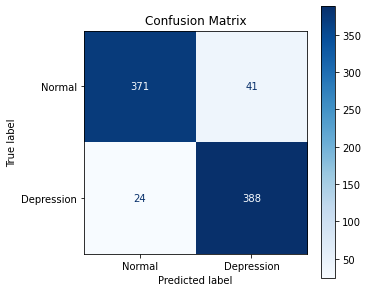

In [32]:
# Confusion matrix - > %로 나타내기!
label=['Normal', 'Depression'] # 라벨 설정

plot = plot_confusion_matrix(knn, # 분류 모델
                             X_train_over, y_train_over, # 예측 데이터와 예측값의 정답(y_true)
                             display_labels=label, # 표에 표시할 labels
                             cmap='Blues', # 컬러맵(plt.cm.Reds, plt.cm.rainbow 등이 있음)
                             normalize=None) # 'true', 'pred', 'all' 중에서 지정 가능. default=None
plot.ax_.set_title('Confusion Matrix')

In [33]:
knn = KNeighborsClassifier(n_neighbors=4) # random_state 를 바꾸면 decision tree가 바뀜
knn.fit(X_train_over,y_train_over)
pred = knn.predict(np.array(X_test))

print('f1: {0:.4f}'.format(metrics.f1_score(y_test , pred, average  = "weighted")))
print('accuracy: {0:.4f}'.format(metrics.accuracy_score(y_test , pred)))
print('precision: {0:.4f}'.format(metrics.precision_score(y_test , pred, average  = "weighted")))
print('recall: {0:.4f}'.format(metrics.recall_score(y_test , pred, average  = "weighted")))

f1: 0.7098
accuracy: 0.7133
precision: 0.7069
recall: 0.7133


Text(0.5, 1.0, 'Confusion Matrix')

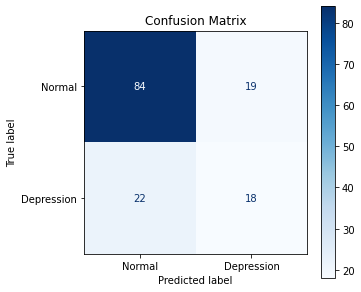

In [34]:
# Confusion matrix - > %로 나타내기!
label=['Normal', 'Depression'] # 라벨 설정

plot = plot_confusion_matrix(knn, # 분류 모델
                             X_test, y_test, # 예측 데이터와 예측값의 정답(y_true)
                             display_labels=label, # 표에 표시할 labels
                             cmap='Blues', # 컬러맵(plt.cm.Reds, plt.cm.rainbow 등이 있음)
                             normalize=None) # 'true', 'pred', 'all' 중에서 지정 가능. default=None
plot.ax_.set_title('Confusion Matrix')

# SVM

In [35]:
param_grid = {'C': [0.001, 0.01, 0.1, 1],
             'gamma': [0.0001,0.001, 0.01, 0.1, 1, 10, 100] }
svm = SVC(probability=True)

In [36]:
grid_svm = GridSearchCV(svm, param_grid=param_grid, cv=5,scoring='f1_micro', refit=True)

grid_svm.fit(X_train_over, y_train_over)

# GridSearchCV 결과 추출하여 DataFrame으로 변환
scores_df = pd.DataFrame(grid_svm.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score',
           'split0_test_score', 'split1_test_score', 'split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'C': 0.001, 'gamma': 0.0001}",0.548795,13,0.496970,0.496970,0.496970
1,"{'C': 0.001, 'gamma': 0.001}",0.548795,13,0.496970,0.496970,0.496970
2,"{'C': 0.001, 'gamma': 0.01}",0.546356,18,0.496970,0.496970,0.496970
3,"{'C': 0.001, 'gamma': 0.1}",0.565868,7,0.496970,0.496970,0.496970
4,"{'C': 0.001, 'gamma': 1}",0.504893,21,0.496970,0.496970,0.496970
5,"{'C': 0.001, 'gamma': 10}",0.504893,21,0.496970,0.496970,0.496970
6,"{'C': 0.001, 'gamma': 100}",0.501234,27,0.496970,0.496970,0.496970
7,"{'C': 0.01, 'gamma': 0.0001}",0.548795,13,0.496970,0.496970,0.496970
8,"{'C': 0.01, 'gamma': 0.001}",0.548795,13,0.496970,0.496970,0.496970
9,"{'C': 0.01, 'gamma': 0.01}",0.546356,18,0.496970,0.496970,0.496970


In [37]:
print('GridSearchCV 최적 파라미터:', grid_svm.best_params_)
print('GridSearchCV 최고f1: {0:.4f}'.format(grid_svm.best_score_))

GridSearchCV 최적 파라미터: {'C': 1, 'gamma': 0.1}
GridSearchCV 최고f1: 0.8375


In [38]:
svm = SVC(C= 1,gamma=0.1,probability=True, random_state=400)
svm.fit(X_train_over,y_train_over)
pred = svm.predict(np.array(X_train_over))

print('f1: {0:.4f}'.format(metrics.f1_score(y_train_over , pred, average  = "weighted")))
print('accuracy: {0:.4f}'.format(metrics.accuracy_score(y_train_over , pred)))
print('precision: {0:.4f}'.format(metrics.precision_score(y_train_over , pred, average  = "weighted")))
print('recall: {0:.4f}'.format(metrics.recall_score(y_train_over , pred, average  = "weighted")))

f1: 0.9684
accuracy: 0.9684
precision: 0.9688
recall: 0.9684


Text(0.5, 1.0, 'Confusion Matrix')

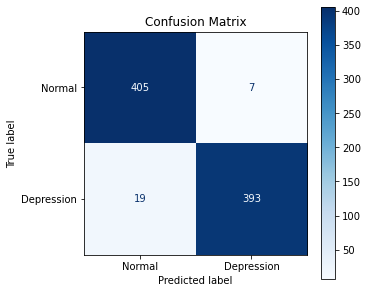

In [39]:
# Confusion matrix - > %로 나타내기!
label=['Normal', 'Depression'] # 라벨 설정

plot = plot_confusion_matrix(svm, # 분류 모델
                             X_train_over, y_train_over, # 예측 데이터와 예측값의 정답(y_true)
                             display_labels=label, # 표에 표시할 labels
                             cmap='Blues', # 컬러맵(plt.cm.Reds, plt.cm.rainbow 등이 있음)
                             normalize=None) # 'true', 'pred', 'all' 중에서 지정 가능. default=None
plot.ax_.set_title('Confusion Matrix')

In [40]:
svm = SVC(C= 1,gamma=0.1,probability=True, random_state=400)
svm.fit(X_train_over,y_train_over)
pred = svm.predict(np.array(X_test))

print('f1: {0:.4f}'.format(metrics.f1_score(y_test , pred, average  = "weighted")))
print('accuracy: {0:.4f}'.format(metrics.accuracy_score(y_test , pred)))
print('precision: {0:.4f}'.format(metrics.precision_score(y_test , pred, average  = "weighted")))
print('recall: {0:.4f}'.format(metrics.recall_score(y_test , pred, average  = "weighted")))

f1: 0.7162
accuracy: 0.7413
precision: 0.7163
recall: 0.7413


Text(0.5, 1.0, 'Confusion Matrix')

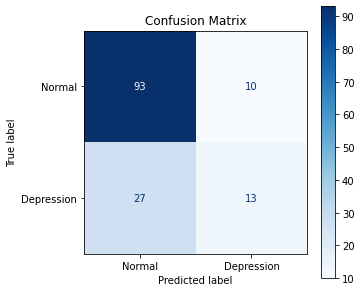

In [41]:
# Confusion matrix - > %로 나타내기!
label=['Normal', 'Depression'] # 라벨 설정

plot = plot_confusion_matrix(svm, # 분류 모델
                             X_test, y_test, # 예측 데이터와 예측값의 정답(y_true)
                             display_labels=label, # 표에 표시할 labels
                             cmap='Blues', # 컬러맵(plt.cm.Reds, plt.cm.rainbow 등이 있음)
                             normalize=None) # 'true', 'pred', 'all' 중에서 지정 가능. default=None
plot.ax_.set_title('Confusion Matrix')

# Perceptron

In [42]:
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100],
             'l1_ratio': [0.0001,0.001, 0.01, 0.1],
             'max_iter': [500,600,700,800,1000],
             'eta0': [0.01,0.05,0.1,0.2,0.3]}
perceptron = Perceptron(tol=1e-3, random_state=400)

In [43]:
grid_perceptron = GridSearchCV(perceptron, param_grid=param_grid, cv=5,scoring='f1_micro', refit=True)

grid_perceptron.fit(X_train_over, y_train_over)

# GridSearchCV 결과 추출하여 DataFrame으로 변환
scores_df = pd.DataFrame(grid_perceptron.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score',
           'split0_test_score', 'split1_test_score', 'split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'alpha': 0.001, 'eta0': 0.01, 'l1_ratio': 0.0...",0.656704,121,0.600000,0.545455,0.775758
1,"{'alpha': 0.001, 'eta0': 0.01, 'l1_ratio': 0.0...",0.656704,121,0.600000,0.545455,0.775758
2,"{'alpha': 0.001, 'eta0': 0.01, 'l1_ratio': 0.0...",0.656704,121,0.600000,0.545455,0.775758
3,"{'alpha': 0.001, 'eta0': 0.01, 'l1_ratio': 0.0...",0.656704,121,0.600000,0.545455,0.775758
4,"{'alpha': 0.001, 'eta0': 0.01, 'l1_ratio': 0.0...",0.656704,121,0.600000,0.545455,0.775758
...,...,...,...,...,...,...
595,"{'alpha': 100, 'eta0': 0.3, 'l1_ratio': 0.1, '...",0.663976,1,0.666667,0.618182,0.678788
596,"{'alpha': 100, 'eta0': 0.3, 'l1_ratio': 0.1, '...",0.663976,1,0.666667,0.618182,0.678788
597,"{'alpha': 100, 'eta0': 0.3, 'l1_ratio': 0.1, '...",0.663976,1,0.666667,0.618182,0.678788
598,"{'alpha': 100, 'eta0': 0.3, 'l1_ratio': 0.1, '...",0.663976,1,0.666667,0.618182,0.678788


In [44]:
print('GridSearchCV 최적 파라미터:', grid_perceptron.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_perceptron.best_score_))

GridSearchCV 최적 파라미터: {'alpha': 0.001, 'eta0': 0.3, 'l1_ratio': 0.0001, 'max_iter': 500}
GridSearchCV 최고 정확도: 0.6640


In [45]:
perc = Perceptron(alpha= 0.001, eta0= 0.3, l1_ratio= 0.0001, max_iter= 500, tol=1e-3, random_state=400)
perc.fit(X_train_over,y_train_over)
pred = perc.predict(np.array(X_train_over))

print('f1: {0:.4f}'.format(metrics.f1_score(y_train_over , pred, average  = "weighted")))
print('accuracy: {0:.4f}'.format(metrics.accuracy_score(y_train_over , pred)))
print('precision: {0:.4f}'.format(metrics.precision_score(y_train_over , pred, average  = "weighted")))
print('recall: {0:.4f}'.format(metrics.recall_score(y_train_over , pred, average  = "weighted")))

f1: 0.6762
accuracy: 0.6857
precision: 0.7103
recall: 0.6857


Text(0.5, 1.0, 'Confusion Matrix')

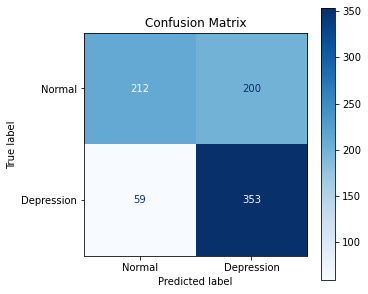

In [76]:
# Confusion matrix - > %로 나타내기!
label=['Normal', 'Depression'] # 라벨 설정

plot = plot_confusion_matrix(perc, # 분류 모델
                             X_train_over, y_train_over, # 예측 데이터와 예측값의 정답(y_true)
                             display_labels=label, # 표에 표시할 labels
                             cmap='Blues', # 컬러맵(plt.cm.Reds, plt.cm.rainbow 등이 있음)
                             normalize=None) # 'true', 'pred', 'all' 중에서 지정 가능. default=None
plot.ax_.set_title('Confusion Matrix')

In [47]:
perc = Perceptron(alpha= 0.001, eta0= 0.3, l1_ratio= 0.0001, max_iter= 500, tol=1e-3, random_state=400)
perc.fit(X_train_over,y_train_over)
pred = perc.predict(np.array(X_test))

print('f1: {0:.4f}'.format(metrics.f1_score(y_test , pred, average  = "weighted")))
print('accuracy: {0:.4f}'.format(metrics.accuracy_score(y_test , pred)))
print('precision: {0:.4f}'.format(metrics.precision_score(y_test , pred, average  = "weighted")))
print('recall: {0:.4f}'.format(metrics.recall_score(y_test , pred, average  = "weighted")))

f1: 0.5917
accuracy: 0.5734
precision: 0.7167
recall: 0.5734


Text(0.5, 1.0, 'Confusion Matrix')

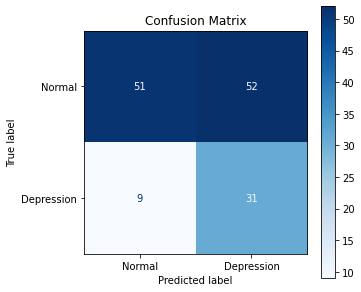

In [48]:
# Confusion matrix - > %로 나타내기!
label=['Normal', 'Depression'] # 라벨 설정

plot = plot_confusion_matrix(perc, # 분류 모델
                             X_test, y_test, # 예측 데이터와 예측값의 정답(y_true)
                             display_labels=label, # 표에 표시할 labels
                             cmap='Blues', # 컬러맵(plt.cm.Reds, plt.cm.rainbow 등이 있음)
                             normalize=None) # 'true', 'pred', 'all' 중에서 지정 가능. default=None
plot.ax_.set_title('Confusion Matrix')

# XGB

In [49]:
xg_parameters ={'booster':['gbtree'],'nthread':[4], #when use hyperthread, xgboost may become slower
            'objective':['reg:linear'],
            'learning_rate' : [0.01,0.05,0.1], #so called `eta` value
            'gamma':[0,0.01,0.05,0.1],
                  'max_depth' : [2,3,4],
                  'min_child_weight': [1],
                  'silent': [None],
                  'subsample': [0.7,0.8,0.9,1],
                  'colsample_bytree': [0.7,0.8,0.9,1],
                  'n_estimators': [150]}

In [50]:
xgb = XGBClassifier(random_state=400)

In [51]:
grid_xgb = model_selection.GridSearchCV(estimator = xgb,param_grid = xg_parameters, scoring='f1_micro', cv=5)

grid_xgb.fit(X_train_over,y_train_over)

best_xg = grid_xgb.best_estimator_

scores_df = pd.DataFrame(grid_xgb.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score',
           'split0_test_score', 'split1_test_score', 'split2_test_score']]

[19:54:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:54:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:54:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:54:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:54:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:54:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:20

[19:55:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:55:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:55:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:55:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:55:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:55:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:20

[19:55:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:55:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:55:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:55:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:55:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:55:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:20

[19:55:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:55:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:55:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:55:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:55:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:55:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:20

[19:55:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:55:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:55:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:55:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:55:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:55:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:20

[19:55:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:55:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:55:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:55:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:55:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:55:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:20

[19:55:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:55:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:55:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:55:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:55:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:55:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:20

[19:55:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:55:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:55:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:55:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:55:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:55:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:20

[19:55:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:55:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:55:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:55:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:55:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:55:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:20

[19:55:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:55:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:55:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:55:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:55:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:55:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:20

[19:55:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:55:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:55:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:55:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:55:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:55:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:20

[19:55:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:55:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:55:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:55:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:55:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:55:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:20

[19:55:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:55:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:55:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:55:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:55:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:55:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:20

[19:55:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:55:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:55:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:55:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:55:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:55:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:20

[19:55:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:55:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:55:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:55:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:55:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:55:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:20

[19:56:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:56:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:56:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:56:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:56:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:56:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:20

[19:56:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:56:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:56:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:56:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:56:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:56:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:20

[19:56:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:56:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:56:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:56:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:56:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:56:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:20

[19:56:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:56:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:56:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:56:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:56:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:56:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:20

[19:56:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:56:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:56:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:56:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:56:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:56:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:20

[19:56:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:56:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:56:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:56:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:56:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:56:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:20

[19:56:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:56:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:56:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:56:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:56:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:56:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:20

[19:56:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:56:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:56:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:56:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:56:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:56:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:20

[19:56:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:56:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:56:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:56:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:56:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:56:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:20

[19:56:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:56:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:56:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:56:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:56:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:56:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:20

[19:56:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:56:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:56:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:56:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:56:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:56:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:20

[19:56:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:56:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:56:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:56:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:56:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:56:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:20

[19:56:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:56:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:56:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:56:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:56:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:56:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:20

[19:57:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:57:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:57:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:57:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:57:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:57:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:20

[19:57:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:57:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:57:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:57:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:57:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:57:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:20

[19:57:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:57:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:57:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:57:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:57:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:57:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:20

[19:57:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:57:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:57:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:57:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:57:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:57:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:20

[19:57:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:57:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:57:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:57:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:57:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:57:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:20

[19:57:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:57:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:57:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:57:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:57:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:57:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:20

[19:57:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:57:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:57:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:57:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:57:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:57:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:20

[19:57:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:57:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:57:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:57:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:57:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:57:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:20

[19:57:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:57:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:57:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:57:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:57:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:57:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:20

[19:57:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:57:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:57:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:57:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:57:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:57:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:20

[19:57:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:57:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:57:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:57:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:57:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:57:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:20

[19:57:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:57:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:57:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:57:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:57:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:57:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:20

[19:57:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:57:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:57:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:57:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:57:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:57:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:20

[19:57:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:57:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:57:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:57:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:58:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:58:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:20

[19:58:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:58:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:58:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:58:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:58:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:58:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:20

[19:58:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:58:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:58:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:58:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:58:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:58:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:20

[19:58:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:58:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:58:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:58:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:58:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:58:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:20

[19:58:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:58:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:58:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:58:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:58:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:58:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:20

[19:58:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:58:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:58:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:58:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:58:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:58:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:20

[19:58:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:58:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:58:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:58:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:58:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:58:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:20

[19:58:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:58:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:58:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:58:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:58:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:58:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:20

[19:58:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:58:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:58:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:58:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:58:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:58:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:20

[19:58:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:58:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:58:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:58:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:58:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:58:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:20

[19:58:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:58:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:58:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:58:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:58:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:58:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:20

[19:59:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:59:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:59:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:59:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:59:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:59:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:20

[19:59:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:59:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:59:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:59:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:59:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:59:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:20

[19:59:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:59:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:59:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:59:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:59:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:59:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:20

[19:59:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:59:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:59:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:59:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:59:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:59:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:20

[19:59:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:59:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:59:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:59:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:59:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:59:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:20

[19:59:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:59:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:59:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:59:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:59:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:59:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:20

[19:59:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:59:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:59:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:59:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:59:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:59:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:20

[19:59:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:59:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:59:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:59:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:59:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:59:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:20

[19:59:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:59:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:59:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:59:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:59:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:59:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:20

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'booster': 'gbtree', 'colsample_bytree': 0.7,...",0.750103,462,0.703030,0.672727,0.781818
1,"{'booster': 'gbtree', 'colsample_bytree': 0.7,...",0.747679,486,0.709091,0.666667,0.781818
2,"{'booster': 'gbtree', 'colsample_bytree': 0.7,...",0.745262,494,0.696970,0.660606,0.781818
3,"{'booster': 'gbtree', 'colsample_bytree': 0.7,...",0.740414,549,0.690909,0.654545,0.781818
4,"{'booster': 'gbtree', 'colsample_bytree': 0.7,...",0.758618,413,0.721212,0.654545,0.787879
...,...,...,...,...,...,...
571,"{'booster': 'gbtree', 'colsample_bytree': 1, '...",0.770732,309,0.678788,0.654545,0.860606
572,"{'booster': 'gbtree', 'colsample_bytree': 1, '...",0.798610,25,0.703030,0.690909,0.890909
573,"{'booster': 'gbtree', 'colsample_bytree': 1, '...",0.787694,105,0.703030,0.660606,0.866667
574,"{'booster': 'gbtree', 'colsample_bytree': 1, '...",0.801057,16,0.696970,0.684848,0.903030


In [52]:
print('GridSearchCV 최적 파라미터:', grid_xgb.best_params_)
print('GridSearchCV 최고 f1: {0:.4f}'.format(grid_xgb.best_score_))

GridSearchCV 최적 파라미터: {'booster': 'gbtree', 'colsample_bytree': 0.7, 'gamma': 0.01, 'learning_rate': 0.1, 'max_depth': 4, 'min_child_weight': 1, 'n_estimators': 150, 'nthread': 4, 'objective': 'reg:linear', 'silent': None, 'subsample': 0.8}
GridSearchCV 최고 f1: 0.8120


In [53]:
xgb = XGBClassifier(booster= 'gbtree', colsample_bytree= 0.7, gamma= 0.01, learning_rate= 0.1, max_depth= 4, min_child_weight= 1,
                  n_estimators= 150, nthread= 4, objective= 'reg:linear', silent= None, subsample= 0.8, random_state=400)
xgb.fit(X_train_over,y_train_over)
pred = xgb.predict(np.array(X_train_over))

print('f1: {0:.4f}'.format(metrics.f1_score(y_train_over , pred, average  = "weighted")))
print('accuracy: {0:.4f}'.format(metrics.accuracy_score(y_train_over , pred)))
print('precision: {0:.4f}'.format(metrics.precision_score(y_train_over , pred, average  = "weighted")))
print('recall: {0:.4f}'.format(metrics.recall_score(y_train_over , pred, average  = "weighted")))

[19:59:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
f1: 0.9951
accuracy: 0.9951
precision: 0.9952
recall: 0.9951


Text(0.5, 1.0, 'Confusion Matrix')

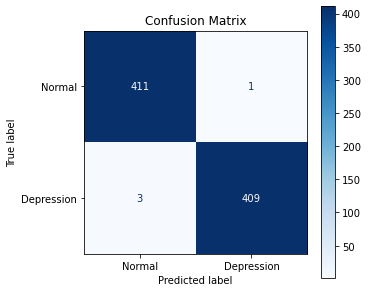

In [54]:
# Confusion matrix - > %로 나타내기!
label=['Normal', 'Depression'] # 라벨 설정

plot = plot_confusion_matrix(xgb, # 분류 모델
                             X_train_over, y_train_over, # 예측 데이터와 예측값의 정답(y_true)
                             display_labels=label, # 표에 표시할 labels
                             cmap='Blues', # 컬러맵(plt.cm.Reds, plt.cm.rainbow 등이 있음)
                             normalize=None) # 'true', 'pred', 'all' 중에서 지정 가능. default=None
plot.ax_.set_title('Confusion Matrix')

In [55]:
xgb = XGBClassifier(booster= 'gbtree', colsample_bytree= 0.7, gamma= 0.01, learning_rate= 0.1, max_depth= 4, min_child_weight= 1,
                  n_estimators= 150, nthread= 4, objective= 'reg:linear', silent= None, subsample= 0.8, random_state=400)
xgb.fit(X_train_over,y_train_over)
pred = xgb.predict(np.array(X_test))

print('f1: {0:.4f}'.format(metrics.f1_score(y_test , pred, average  = "weighted")))
print('accuracy: {0:.4f}'.format(metrics.accuracy_score(y_test , pred)))
print('precision: {0:.4f}'.format(metrics.precision_score(y_test , pred, average  = "weighted")))
print('recall: {0:.4f}'.format(metrics.recall_score(y_test , pred, average  = "weighted")))

[19:59:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
f1: 0.7331
accuracy: 0.7413
precision: 0.7288
recall: 0.7413


Text(0.5, 1.0, 'Confusion Matrix')

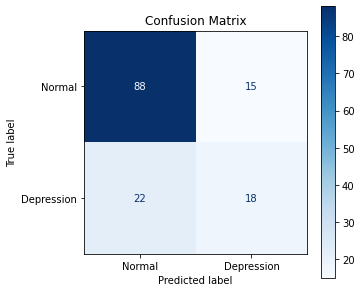

In [56]:
# Confusion matrix - > %로 나타내기!
label=['Normal', 'Depression'] # 라벨 설정

plot = plot_confusion_matrix(xgb, # 분류 모델
                             X_test, y_test, # 예측 데이터와 예측값의 정답(y_true)
                             display_labels=label, # 표에 표시할 labels
                             cmap='Blues', # 컬러맵(plt.cm.Reds, plt.cm.rainbow 등이 있음)
                             normalize=None) # 'true', 'pred', 'all' 중에서 지정 가능. default=None
plot.ax_.set_title('Confusion Matrix')

# Gradient Boosting

In [57]:
gbrt = GradientBoostingClassifier(random_state=400)
gbrt.fit(X_train_over, y_train_over)

GradientBoostingClassifier(random_state=400)

In [58]:
gbrt_parameters = {'learning_rate' : [0.001,0.005,0.01,0.02], #so called `eta` value
                  'max_depth' : [1,2,3,4],
                  'n_estimators': [200,250,300],}

In [59]:
grid_gbrt = model_selection.GridSearchCV(estimator = gbrt,param_grid = gbrt_parameters, scoring='f1_micro', cv=5)

grid_gbrt.fit(X_train_over,y_train_over)

best_gbrt = grid_gbrt.best_estimator_

scores_df = pd.DataFrame(grid_gbrt.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score',
           'split0_test_score', 'split1_test_score', 'split2_test_score']]



,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'learning_rate': 0.001, 'max_depth': 1, 'n_es...",0.706401,45,0.684848,0.660606,0.745455
1,"{'learning_rate': 0.001, 'max_depth': 1, 'n_es...",0.706401,45,0.684848,0.660606,0.745455
2,"{'learning_rate': 0.001, 'max_depth': 1, 'n_es...",0.706401,45,0.684848,0.660606,0.745455
3,"{'learning_rate': 0.001, 'max_depth': 2, 'n_es...",0.713725,43,0.660606,0.636364,0.739394
4,"{'learning_rate': 0.001, 'max_depth': 2, 'n_es...",0.713725,43,0.660606,0.636364,0.739394
5,"{'learning_rate': 0.001, 'max_depth': 2, 'n_es...",0.717361,40,0.660606,0.654545,0.739394
6,"{'learning_rate': 0.001, 'max_depth': 3, 'n_es...",0.723422,37,0.709091,0.642424,0.745455
7,"{'learning_rate': 0.001, 'max_depth': 3, 'n_es...",0.727058,33,0.721212,0.642424,0.739394
8,"{'learning_rate': 0.001, 'max_depth': 3, 'n_es...",0.727058,33,0.721212,0.642424,0.739394
9,"{'learning_rate': 0.001, 'max_depth': 4, 'n_es...",0.723392,38,0.666667,0.642424,0.793939


In [60]:
print('GridSearchCV 최적 파라미터:', grid_gbrt.best_params_)
print('GridSearchCV 최고 f1: {0:.4f}'.format(grid_gbrt.best_score_))

GridSearchCV 최적 파라미터: {'learning_rate': 0.02, 'max_depth': 4, 'n_estimators': 300}
GridSearchCV 최고 f1: 0.7756


In [61]:
gbrt = GradientBoostingClassifier(learning_rate= 0.02, max_depth= 4, n_estimators= 300, random_state =400 )
gbrt.fit(X_train_over,y_train_over)
pred = gbrt.predict(np.array(X_train_over))

print('f1: {0:.4f}'.format(metrics.f1_score(y_train_over , pred, average  = "weighted")))
print('accuracy: {0:.4f}'.format(metrics.accuracy_score(y_train_over , pred)))
print('precision: {0:.4f}'.format(metrics.precision_score(y_train_over , pred, average  = "weighted")))
print('recall: {0:.4f}'.format(metrics.recall_score(y_train_over , pred, average  = "weighted")))

f1: 0.9284
accuracy: 0.9284
precision: 0.9284
recall: 0.9284


Text(0.5, 1.0, 'Confusion Matrix')

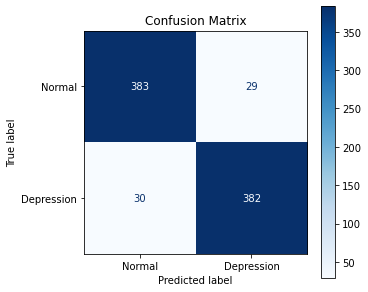

In [62]:
# Confusion matrix - > %로 나타내기!
label=['Normal', 'Depression'] # 라벨 설정

plot = plot_confusion_matrix(gbrt, # 분류 모델
                             X_train_over, y_train_over, # 예측 데이터와 예측값의 정답(y_true)
                             display_labels=label, # 표에 표시할 labels
                             cmap='Blues', # 컬러맵(plt.cm.Reds, plt.cm.rainbow 등이 있음)
                             normalize=None) # 'true', 'pred', 'all' 중에서 지정 가능. default=None
plot.ax_.set_title('Confusion Matrix')

In [63]:
gbrt = GradientBoostingClassifier(learning_rate= 0.02, max_depth= 4, n_estimators= 300, random_state =400 )
gbrt.fit(X_train_over,y_train_over)
pred = gbrt.predict(np.array(X_test))

print('f1: {0:.4f}'.format(metrics.f1_score(y_test , pred, average  = "weighted")))
print('accuracy: {0:.4f}'.format(metrics.accuracy_score(y_test , pred)))
print('precision: {0:.4f}'.format(metrics.precision_score(y_test , pred, average  = "weighted")))
print('recall: {0:.4f}'.format(metrics.recall_score(y_test , pred, average  = "weighted")))

f1: 0.7422
accuracy: 0.7413
precision: 0.7433
recall: 0.7413


Text(0.5, 1.0, 'Confusion Matrix')

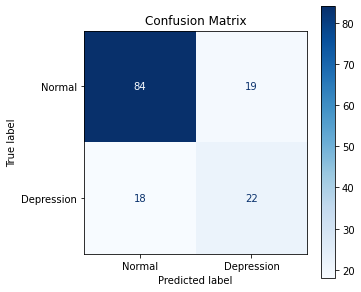

In [64]:
# Confusion matrix - > %로 나타내기!
label=['Normal', 'Depression'] # 라벨 설정

plot = plot_confusion_matrix(gbrt, # 분류 모델
                             X_test, y_test, # 예측 데이터와 예측값의 정답(y_true)
                             display_labels=label, # 표에 표시할 labels
                             cmap='Blues', # 컬러맵(plt.cm.Reds, plt.cm.rainbow 등이 있음)
                             normalize=None) # 'true', 'pred', 'all' 중에서 지정 가능. default=None
plot.ax_.set_title('Confusion Matrix')

# Adaboost

In [65]:
ada_parameters = {'learning_rate' : [0.01,0.03,0.05,0.07], #so called `eta` value
                  'n_estimators': [250,300,350],}

In [66]:
ada = AdaBoostClassifier(random_state = 400)
grid_ada = model_selection.GridSearchCV(estimator = ada,param_grid = ada_parameters, scoring='f1_micro', cv=5)

grid_ada.fit(X_train_over,y_train_over)

best_ada = grid_ada.best_estimator_
scores_df = pd.DataFrame(grid_ada.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score',
           'split0_test_score', 'split1_test_score', 'split2_test_score']]



,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'learning_rate': 0.01, 'n_estimators': 250}",0.727044,12,0.684848,0.648485,0.769697
1,"{'learning_rate': 0.01, 'n_estimators': 300}",0.730680,11,0.684848,0.648485,0.781818
2,"{'learning_rate': 0.01, 'n_estimators': 350}",0.734324,10,0.696970,0.642424,0.781818
3,"{'learning_rate': 0.03, 'n_estimators': 250}",0.742809,9,0.709091,0.630303,0.775758
4,"{'learning_rate': 0.03, 'n_estimators': 300}",0.745240,8,0.709091,0.624242,0.775758
5,"{'learning_rate': 0.03, 'n_estimators': 350}",0.745248,7,0.715152,0.612121,0.769697
6,"{'learning_rate': 0.05, 'n_estimators': 250}",0.750096,5,0.715152,0.606061,0.800000
7,"{'learning_rate': 0.05, 'n_estimators': 300}",0.756164,1,0.715152,0.618182,0.812121
8,"{'learning_rate': 0.05, 'n_estimators': 350}",0.754945,2,0.709091,0.612121,0.818182
9,"{'learning_rate': 0.07, 'n_estimators': 250}",0.753732,3,0.703030,0.606061,0.818182


In [67]:
print('GridSearchCV 최적 파라미터:', grid_ada.best_params_)
print('GridSearchCV 최고 f1: {0:.4f}'.format(grid_ada.best_score_))

GridSearchCV 최적 파라미터: {'learning_rate': 0.05, 'n_estimators': 300}
GridSearchCV 최고 f1: 0.7562


In [68]:
ada = AdaBoostClassifier(learning_rate= 0.05,  n_estimators= 300, random_state =400 )
ada.fit(X_train_over,y_train_over)
pred = ada.predict(np.array(X_train_over))

print('f1: {0:.4f}'.format(metrics.f1_score(y_train_over , pred, average  = "weighted")))
print('accuracy: {0:.4f}'.format(metrics.accuracy_score(y_train_over , pred)))
print('precision: {0:.4f}'.format(metrics.precision_score(y_train_over , pred, average  = "weighted")))
print('recall: {0:.4f}'.format(metrics.recall_score(y_train_over , pred, average  = "weighted")))

f1: 0.7852
accuracy: 0.7852
precision: 0.7852
recall: 0.7852


Text(0.5, 1.0, 'Confusion Matrix')

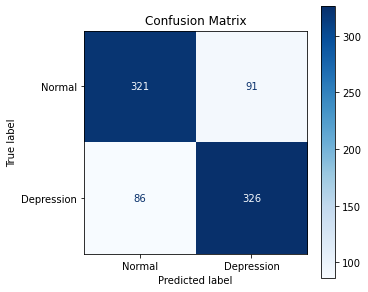

In [69]:
# Confusion matrix - > %로 나타내기!
label=['Normal', 'Depression'] # 라벨 설정

plot = plot_confusion_matrix(ada, # 분류 모델
                             X_train_over, y_train_over, # 예측 데이터와 예측값의 정답(y_true)
                             display_labels=label, # 표에 표시할 labels
                             cmap='Blues', # 컬러맵(plt.cm.Reds, plt.cm.rainbow 등이 있음)
                             normalize=None) # 'true', 'pred', 'all' 중에서 지정 가능. default=None
plot.ax_.set_title('Confusion Matrix')

In [70]:
ada = AdaBoostClassifier(learning_rate= 0.05,  n_estimators= 300, random_state =400 )
ada.fit(X_train_over,y_train_over)
pred = ada.predict(np.array(X_test))

print('f1: {0:.4f}'.format(metrics.f1_score(y_test , pred, average  = "weighted")))
print('accuracy: {0:.4f}'.format(metrics.accuracy_score(y_test , pred)))
print('precision: {0:.4f}'.format(metrics.precision_score(y_test , pred, average  = "weighted")))
print('recall: {0:.4f}'.format(metrics.recall_score(y_test , pred, average  = "weighted")))

f1: 0.6758
accuracy: 0.6643
precision: 0.6962
recall: 0.6643


Text(0.5, 1.0, 'Confusion Matrix')

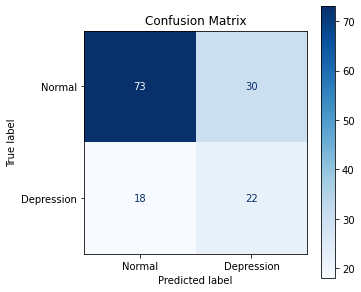

In [71]:
# Confusion matrix - > %로 나타내기!
label=['Normal', 'Depression'] # 라벨 설정

plot = plot_confusion_matrix(ada, # 분류 모델
                             X_test, y_test, # 예측 데이터와 예측값의 정답(y_true)
                             display_labels=label, # 표에 표시할 labels
                             cmap='Blues', # 컬러맵(plt.cm.Reds, plt.cm.rainbow 등이 있음)
                             normalize=None) # 'true', 'pred', 'all' 중에서 지정 가능. default=None
plot.ax_.set_title('Confusion Matrix')

# Ensemble

In [72]:
#Train 확인
voting_model = VotingClassifier(estimators = [('RandomForest',rf_1),('KNN', knn),('SVM',svm),('XGB',xgb),('gradientboosting',gbrt),('adaboost',ada)], voting='hard', weights = None)

voting_model.fit(X_train_over, y_train_over)
pred = voting_model.predict(X_train_over)

print('f1: {0:.4f}'.format(metrics.f1_score(y_train_over , pred, average  = "weighted")))
print('accuracy: {0:.4f}'.format(metrics.accuracy_score(y_train_over , pred)))
print('precision: {0:.4f}'.format(metrics.precision_score(y_train_over , pred, average  = "weighted")))
print('recall: {0:.4f}'.format(metrics.recall_score(y_train_over , pred, average  = "weighted")))

[20:02:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
f1: 0.9478
accuracy: 0.9478
precision: 0.9488
recall: 0.9478


Text(0.5, 1.0, 'Confusion Matrix')

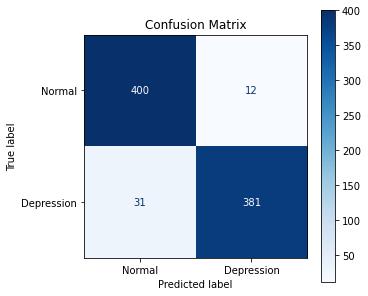

In [73]:
label=['Normal', 'Depression']

plot = plot_confusion_matrix(voting_model, # 분류 모델
                             X_train_over, y_train_over, # 예측 데이터와 예측값의 정답(y_true)
                             display_labels=label, # 표에 표시할 labels
                             cmap='Blues', # 컬러맵(plt.cm.Reds, plt.cm.rainbow 등이 있음)
                             normalize=None) # 'true', 'pred', 'all' 중에서 지정 가능. default=None
plot.ax_.set_title('Confusion Matrix')

In [74]:
#Test 확인
voting_model = VotingClassifier(estimators = [('RandomForest',rf_1),('KNN', knn),('SVM',svm),('XGB',xgb),('gradientboosting',gbrt),('adaboost',ada)], voting='hard', weights = None)
voting_model.fit(X_train_over, y_train_over)
pred = voting_model.predict(X_test)

print('f1: {0:.4f}'.format(metrics.f1_score(y_test , pred, average  = "weighted")))
print('accuracy: {0:.4f}'.format(metrics.accuracy_score(y_test , pred)))
print('precision: {0:.4f}'.format(metrics.precision_score(y_test , pred, average  = "weighted")))
print('recall: {0:.4f}'.format(metrics.recall_score(y_test , pred, average  = "weighted")))

[20:02:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
f1: 0.7535
accuracy: 0.7622
precision: 0.7501
recall: 0.7622


Text(0.5, 1.0, 'Confusion Matrix')

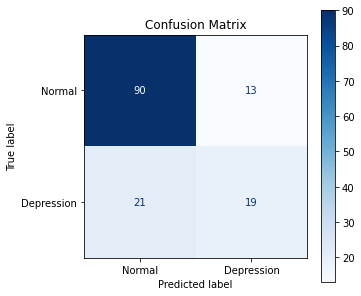

In [75]:
# Confusion matrix - > %로 나타내기!
label=['Normal', 'Depression'] # 라벨 설정

plot = plot_confusion_matrix(voting_model, # 분류 모델
                             X_test, y_test, # 예측 데이터와 예측값의 정답(y_true)
                             display_labels=label, # 표에 표시할 labels
                             cmap='Blues', # 컬러맵(plt.cm.Reds, plt.cm.rainbow 등이 있음)
                             normalize=None) # 'true', 'pred', 'all' 중에서 지정 가능. default=None
plot.ax_.set_title('Confusion Matrix')